# Associated Currents

Notebook to combine electric currents from the dataset with each other. After that, to train and test machine learning models to associated currents.

#### Machine Learning Models:
    - Nearest Centroid
    - K - Nearest Neighbors Classifier
    - Gaussian Naive Bayes
    - Multilayer Perceptron

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
import heapq

## Dataset Original

In [2]:
dataset = pd.read_csv('../../CreatingDataset/TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


## Combinações de Correntes

In [3]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

In [4]:
#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
#transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

### Dois a dois

In [6]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

### Três a três

In [7]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, len(classes)):
            if i+(200*j) < len(dataset) and i+(200*(j+k)) < len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+k))])

### Quatro a quatro

In [8]:
for i in range(200):
    matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*1)] + matrix_dataset[i+(200*(2))] + matrix_dataset[i+(200*(3))])

In [9]:
#Novo dataset
new_dataset = pd.DataFrame(matrix_dataset)

In [10]:
new_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


### Classes do Dataset

In [11]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificador
200 		 NotebookVentiladorGeladeira
200 		 NotebookLiquidificadorGeladeira
200 		 VentiladorLiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificadorGeladeira

Número de Classes: 15


### Análise dos novos sinais

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


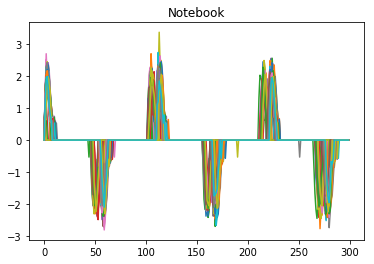

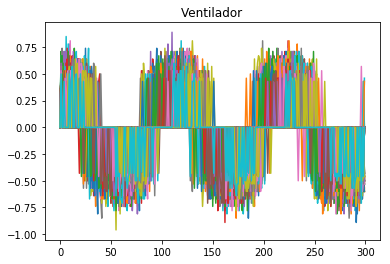

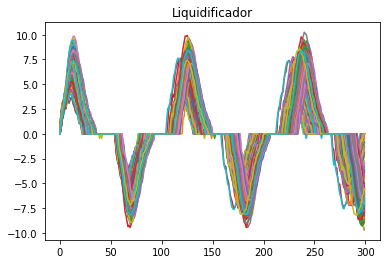

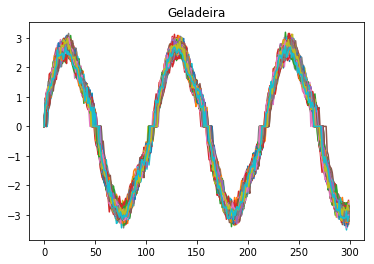

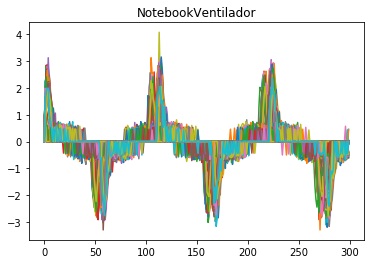

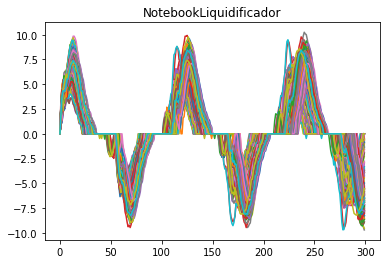

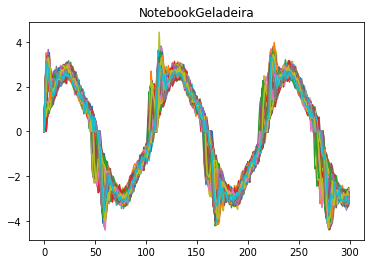

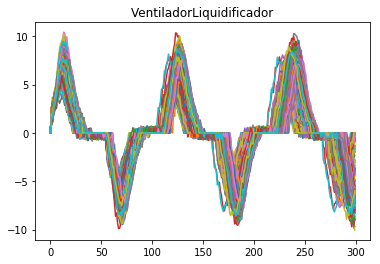

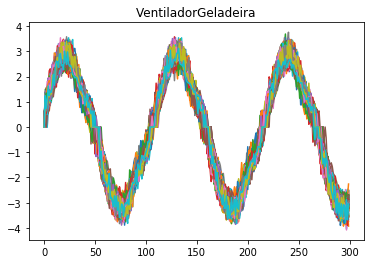

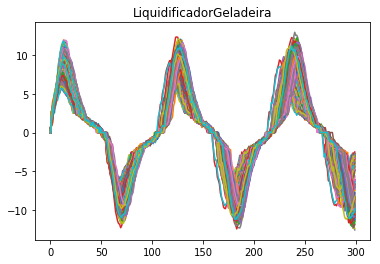

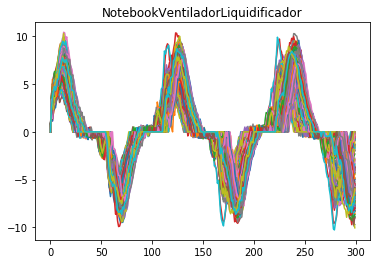

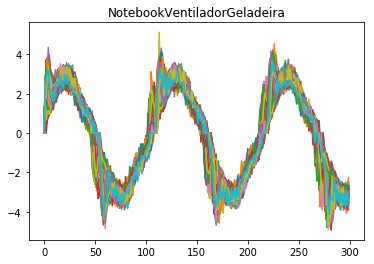

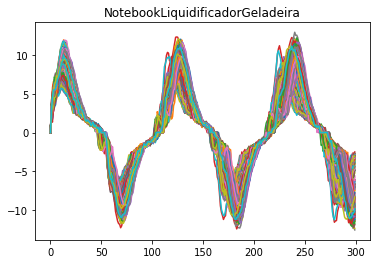

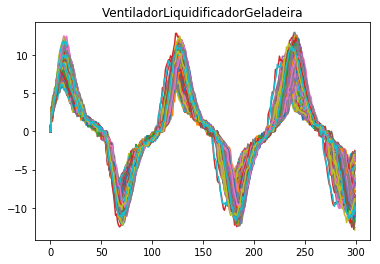

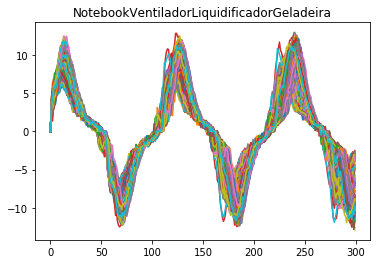

In [12]:
for classe in classes:
    sinal = new_dataset[new_dataset[device_position]==classe]
    sinal.drop([device_position], axis=1, inplace=True)
    for i in range(len(new_dataset)):
        if new_dataset[device_position].loc[i] == classe:
            plt.plot(sinal.loc[i])
    plt.title(classe)
    plt.show()

## Holdout 80/20

In [13]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamento e Teste KNN; K=5

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

print('Acurácia:',accuracy_score(Y_test, previsaokNN))

Acurácia: 0.49333333333333335


## Treinamento e Teste NC

In [15]:
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

print('Acurácia:',accuracy_score(Y_test, previsaoNC))

Acurácia: 0.5766666666666667


## Treianamento e teste GNB

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

accuracy_score(Y_test, previsaoGNB)

0.755

## Treinamento e Teste MLP

In [18]:
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

print('Acurácia:', accuracy_score(Y_test, previsaoMLP))

Acurácia: 0.9333333333333333


### Obtendo entradas mais importantes para a rede neural

In [19]:
def biggers_positions(lista, num):
    positions = []
    i = 0
    maiores = heapq.nlargest(num, lista)
    while i<num:
        for j in range(len(maiores)):
            for k in range(len(lista)):
                if (maiores[j]==lista[k]) and (k not in positions):
                    positions.append(k)
        i+=1
    return positions

In [20]:
transp_matrix = MLP.coefs_[0].transpose()

most_importants = []
for i in range(len(transp_matrix)):
    biggers = biggers_positions(transp_matrix[i],10)
    for j in biggers:
        if j not in most_importants:
            most_importants.append(j)

In [26]:
most_importants.sort()

print('\nEntradas mais relevantes:\n')
print(most_importants,'\n')
print(len(most_importants), 'Entradas')


Entradas mais relevantes:

[1, 2, 3, 4, 10, 12, 17, 19, 21, 24, 29, 33, 34, 35, 36, 37, 39, 42, 43, 50, 51, 52, 53, 54, 56, 60, 65, 66, 67, 68, 72, 73, 79, 83, 94, 95, 99, 103, 104, 105, 106, 107, 108, 109, 113, 124, 125, 130, 136, 156, 157, 160, 177, 182, 184, 191, 200, 202, 203, 207, 208, 212, 216, 236, 242, 243, 244, 247, 256, 259, 262, 265, 266, 267, 270, 286] 

76 Entradas


### Analisando as Entradas mais importantes em um sinal de cada classe

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


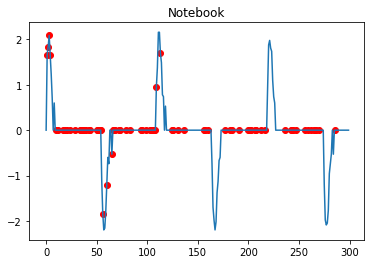

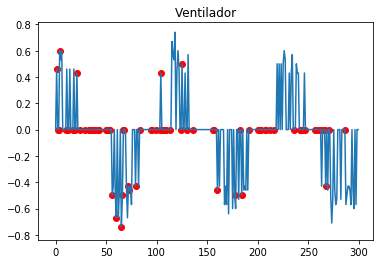

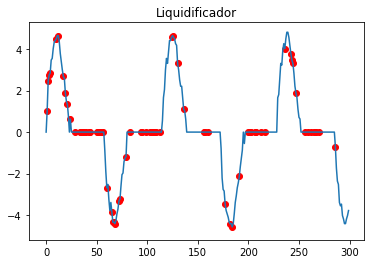

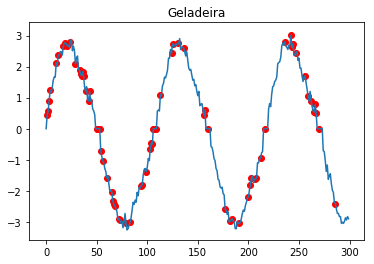

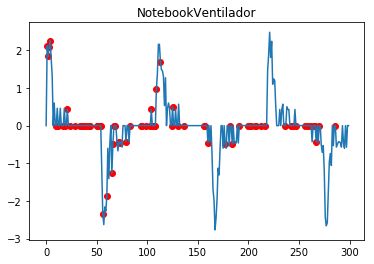

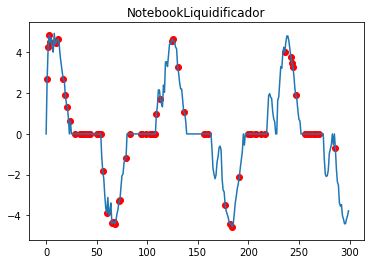

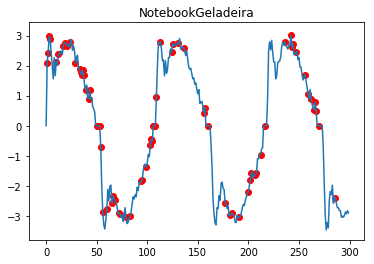

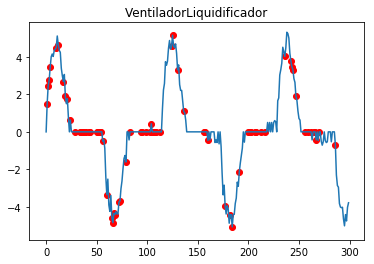

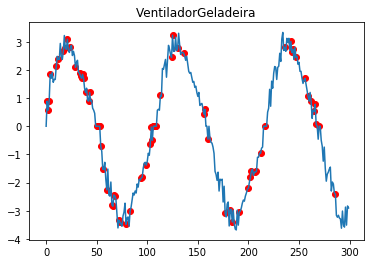

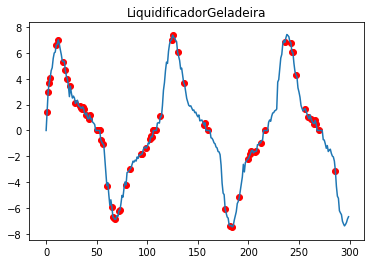

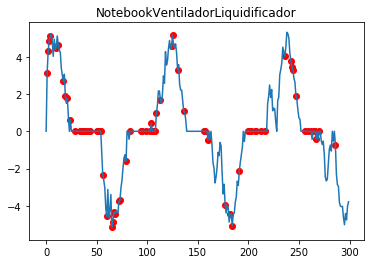

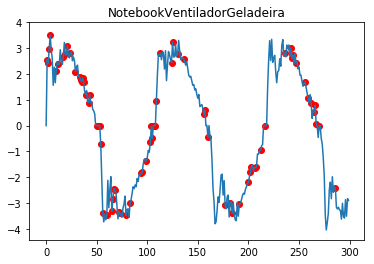

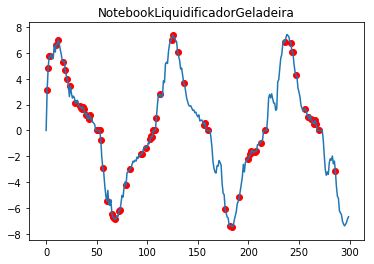

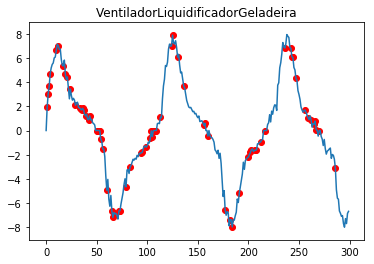

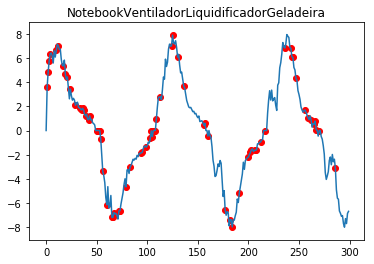

In [23]:
aux = []
for classe in classes:
    sinal = new_dataset[new_dataset[device_position]==classe]
    sinal.drop([device_position], axis=1, inplace=True)
    sinal = sinal.as_matrix()
    if classe not in aux:
        plt.plot(sinal[0])
        aux.append(classe)
    for i in range(len(most_importants)):
        plt.scatter(most_importants[i], sinal[0][most_importants[i]], color='red')
    plt.title(classe)
    plt.show()